<a href="https://colab.research.google.com/github/AdarshSingh001/Stock-Market-Price-Prediction/blob/main/univariate_time_series_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df=pd.read_csv("/content/TSLA.csv")
print("Number of rows and columns:", df.shape)
df.head(5)

Number of rows and columns: (1259, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
3,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
4,2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [ ]:
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

In [ ]:
training_set.shape

(800, 1)

In [ ]:
test_set.shape

(459, 1)

In [ ]:
test_set

array([[ 56.287998],
       [ 57.604   ],
       [ 57.751999],
       [ 58.007999],
       [ 59.338001],
       [ 56.102001],
       [ 60.712002],
       [ 59.540001],
       [ 59.695999],
       [ 60.      ],
       [ 60.382   ],
       [ 62.580002],
       [ 54.051998],
       [ 61.153999],
       [ 62.790001],
       [ 60.666   ],
       [ 58.790001],
       [ 54.93    ],
       [ 52.903999],
       [ 51.049999],
       [ 52.922001],
       [ 51.506001],
       [ 52.200001],
       [ 51.812   ],
       [ 53.139999],
       [ 56.48    ],
       [ 53.858002],
       [ 53.478001],
       [ 52.136002],
       [ 52.773998],
       [ 60.209999],
       [ 63.444   ],
       [ 61.650002],
       [ 67.494003],
       [ 65.678001],
       [ 66.508003],
       [ 67.652   ],
       [ 68.748001],
       [ 68.099998],
       [ 67.814003],
       [ 68.667999],
       [ 69.699997],
       [ 69.800003],
       [ 69.674004],
       [ 66.632004],
       [ 68.540001],
       [ 68.466003],
       [ 69.0

In [ ]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

(740, 60)


In [ ]:
X_train.shape

(740, 60, 1)

In [ ]:
X_train

array([[[0.49064944],
        [0.49077223],
        [0.49015835],
        ...,
        [0.44882765],
        [0.43045381],
        [0.38171624]],

       [[0.49077223],
        [0.49015835],
        [0.50914599],
        ...,
        [0.43045381],
        [0.38171624],
        [0.43589644]],

       [[0.49015835],
        [0.50914599],
        [0.4988338 ],
        ...,
        [0.38171624],
        [0.43589644],
        [0.39972175]],

       ...,

       [[0.83639574],
        [0.84016048],
        [0.86557271],
        ...,
        [0.63272909],
        [0.58407332],
        [0.5830503 ]],

       [[0.84016048],
        [0.86557271],
        [0.87195655],
        ...,
        [0.58407332],
        [0.5830503 ],
        [0.48197407]],

       [[0.86557271],
        [0.87195655],
        [0.91189591],
        ...,
        [0.5830503 ],
        [0.48197407],
        [0.53582684]]])

In [ ]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the RNN to the Training set
history = model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 12s 110ms/step - loss: 0.0579
Epoch 2/100
24/24 [==============================] - 3s 110ms/step - loss: 0.0152
Epoch 3/100
24/24 [==============================] - 3s 110ms/step - loss: 0.0147
Epoch 4/100
24/24 [==============================] - 3s 111ms/step - loss: 0.0123
Epoch 5/100
24/24 [==============================] - 3s 110ms/step - loss: 0.0120
Epoch 6/100
24/24 [==============================] - 3s 110ms/step - loss: 0.0110
Epoch 7/100
24/24 [==============================] - 3s 112ms/step - loss: 0.0120
Epoch 8/100
24/24 [==============================] - 3s 112ms/step - loss: 0.0126
Epoch 9/100
24/24 [==============================] - 3s 112ms/step - loss: 0.0100
Epoch 10/100
24/24 [==============================] - 3s 110ms/step - loss: 0.0101
Epoch 11/100
24/24 [==============================] - 3s 111ms/step - loss: 0.0106
Epoch 12/100
24/24 [==============================] - 3s 113ms/step - loss: 0.0104
Epoch 13/100

In [ ]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(459, 60, 1)


In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

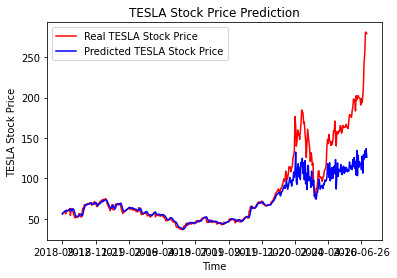

In [ ]:
# Visualising the results
plt.plot(df.loc[800:, "Date"],dataset_test.values, color = "red", label = "Real TESLA Stock Price")
plt.plot(df.loc[800:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

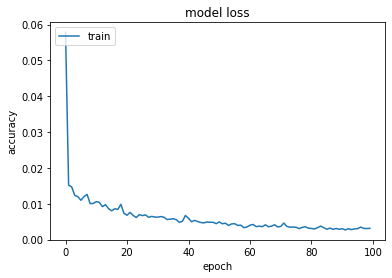

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()